<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Antonia Villegas
- Nombre de alumno 2: Germán Urrea


### **Link de repositorio de GitHub:** `http://....`


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [1]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 67.0 MB/s eta 0:00:00
  Attempting uninstall:

# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [2]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import gdown

try:
  df_retail = pd.read_pickle('online_retail_II.pickle')
except:
  url = 'https://drive.google.com/uc?id=18B5GMBevLKt3CfItjEWk-wVq7XqPh2ra'
  output = 'online_retail_II.pickle'
  gdown.download(url, output, quiet=False)
  df_retail = pd.read_pickle('online_retail_II.pickle')


Downloading...
From: https://drive.google.com/uc?id=18B5GMBevLKt3CfItjEWk-wVq7XqPh2ra
To: /content/online_retail_II.pickle
100%|██████████| 26.7M/26.7M [00:00<00:00, 66.4MB/s]


In [4]:
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


El dataset presenta las siguientes caracteristicas:
-  **Invoice**: Caracteristica categorica. Identifica una compra.
- **StockCode**: Caracteristica categorica. Identifica a un producto de forma única.
- **Description**: Caracteristica textual. Describe el producto.
- **InvoiceDate**: Caracteristica en formato de fecha. Corresponde a la fecha de facturación/compra.
- **Quantity**: Caracteristica númerica. Corresponde a la cantidad comprada
- **Price**: Caracteristica númerica. Corresponde al precio unitario de un producto.
- **Customer ID**: Caracteristica categorica. Sirve como identificador para el comprador.
- **Country**: Caracteristica textual. Representa el país en el que se realiza la orden/compra.

Dadas las caracteristicas, se puede concluir que cada fila representa la venta de un producto a un cliente, incluyendo atributos que permiten identificar la compra como única. Adicionalmente, de acuerdo a las descripciones de los productos, se puede inferir que la tienda vende productos de decoración para el hogar.

## 1.2 Analisís Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

El ánalisis univariable consiste en analizar el comportamiento de una variable de interés en los datos mediante técnicas de estadistica y gráficas. Por otro lado, el ánalisis multivariable se enfoca en 2 o más variables con el objetivo de analizar las relaciones entre estas. Por último, el estudio de datos faltantes se basa en encontrar aquellos datos con valores nulos, generalmente con el objetivo de eliminarlos o asignarles un valor por defecto. En general, este tipo de ánalisis es útil para asegurar el trabajo con datos limpios e identificar patrones y relaciones en las variables de interés. 

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [5]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

#### Invoice

In [6]:
profile_serie(df_retail['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

De las métricas de la variable `Invoice` se desprende que hay un registro de alrededor de 28 mil compras únicas. Del gráfico de frecuencias se desprende que hay compras en donde se ha comprado una gran cantidad de productos distintos.

#### StockCode

In [7]:
profile_serie(df_retail['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

De las métricas para `StockCode` se desprende que hay alrededor que 4632 productos únicos. Del gráfico de frecuencias resalta el código de los productos más populares, también es interesante notar algunos códigos como `POST`, `M` y  `DOT`, los cuales probablemente no correspondan a productos sino a otro tipo de transacciones registradas.

#### Description

In [8]:
profile_serie(df_retail['Description']) 

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Hay 4682 descripciones únicas para los productos, lo que resalta tomando en cuenta que no es el mismo número que para los StockCode, aunque podría deberse a cambios en las descripciones de estos. Algo muy importante a recalcar es la presencia de nan indistinguibles inicialmente en las métricas, esto se puede identificar en el hecho de que la segunda descripción más frecuente sea "nan".

#### Customer ID

In [9]:
profile_serie(df_retail['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Hay 4383 clientes registrados, de los cuales el top 3 han realizado una cantidad de transacciones radicalmente superior al resto (más de 4000). Del ánalisis de metricas también resalta la existencia de valores nulos para los clientes, lo que podría ser un error, o compras por parte de clientes no registrados.

#### Country

In [10]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

Hay 40 valores únicos para el país de venta. Sin embargo la mayoría de ventas se producen en el Reino Unido.

#### Price

In [11]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Existen precios negativos y en cero, lo cuál en el contexto de ventas no tiene sentido. También existen algunos precios inusualmente altos, lo que probablemente sea incorrecto. La distribución de los precios se concentra en los precios de valores más bajos, como indican el valor *skew* y el histograma. Por otro lado, el valor alto de *kurtosis* junto a los histogramas indican que una gran cantidad de precios tienden a concentrarse cerca en un cierto rango (en este caso, entre 0.5 y 1.49). Es de recalcar que los outliers son extremos en este caso, como se puede apreciar en la diferencia de definición entre el primer y segundo histograma.

#### InvoiceDate

In [12]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Es de interés notar que la mayor frecuencia de ventas se concentra en el último tramo de 2010, entre los meses de octubre y noviembre. Mientras que la menor frecuencia se concentra entre finales de 2009 e inicios de 2010.

#### Quantity

In [13]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

Existen cantidades negativas de productos vendidos, lo que en este caso se puede interpretar como un error. También existen algunos valores extremos, en particular hay cantidades del orden de los 19 mil, lo cuál podría interpretarse como un error. Por otro lado el **skew** es positivo, lo que indica que los datos tienen cierta asimetria hacia cantidades superiores al promedio, aunque en este caso hay más valores concentrados en cantidades pequeñas de producto (en particular, entre 0 y 3), cómo se puede verificar en los histogramas y en el valor de kurtosis.

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [14]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

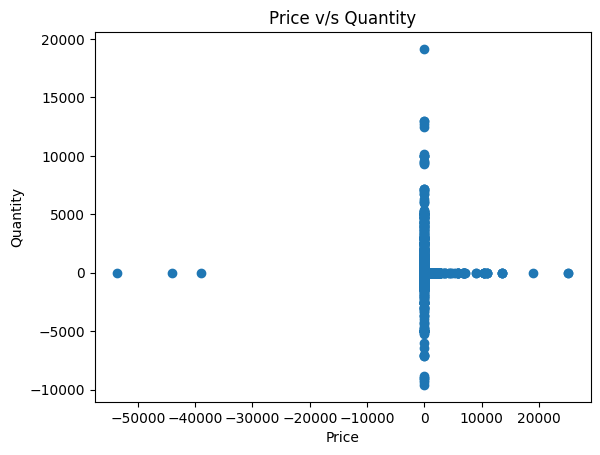

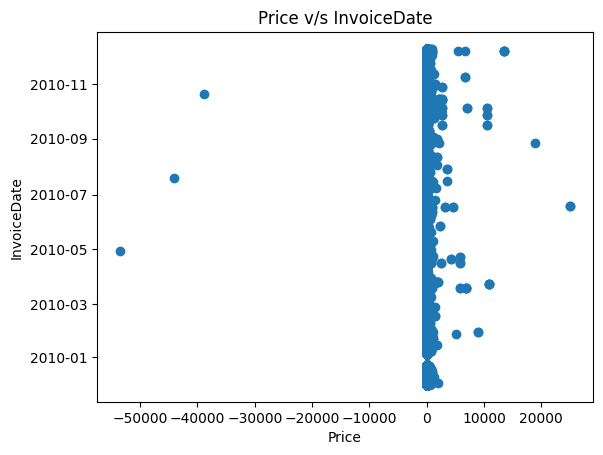

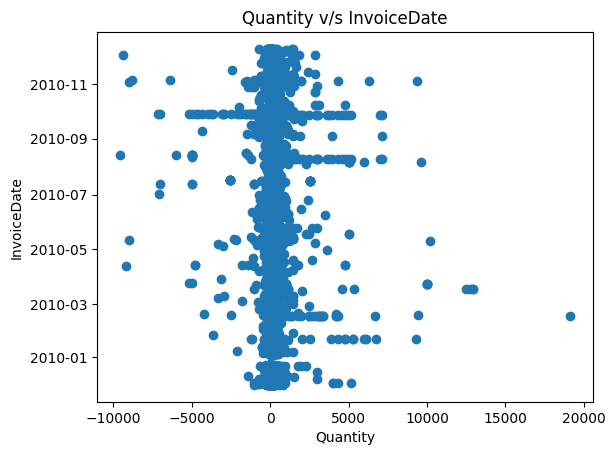

## Correlation:

## Missing Matrix:

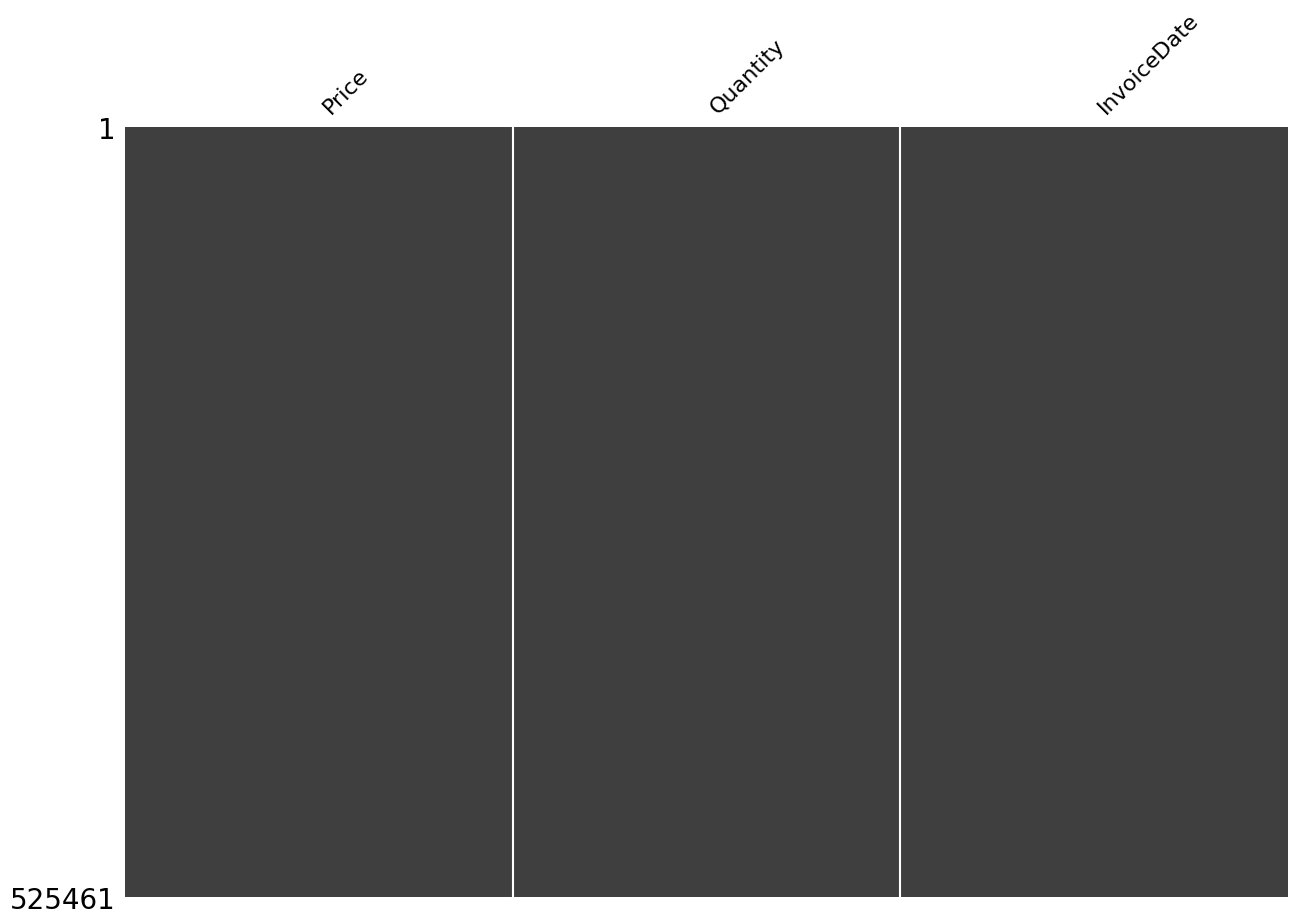

In [51]:
profile_df(df_retail[['Price', 'Quantity', 'InvoiceDate']])

De los gráficos de dispersión resalta la presencia de outliers y valores negativos en las variables `quantity` y `price`. En particular, del gráfico cantidad vs precio resalta la forma perpendicular del gráfico, la cuál sugiere que aquellos productos más baratos se compran en mayores cantidades, mientras que los más caros se compran en menores cantidades.

De la matriz de correlación no se pueden inferir relaciones claras entre las variables, esto debido a la baja correlación entre estas. Es de notar que no hay valores nulos para las variables estudiadas. 

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Se borrará cualquier fila con un valor númerico negativo. A su vez, se eliminará cualquier valor númerico (cantidad o precio en este caso) que corresponda a un outlier (en base al criterio del $z$-score mayor a 3), ya que valores extremos podrían ser asociados a fallas del sistema de transacciones.

El procedimiento estandar sería eliminar cualquier fila con un valor nulo, valores que se han encontrado en las columnas `Description` y `Customer ID`. Se puede asociar una venta en donde `Description` sea "nan" a una transacción de prueba o error en la venta, y si bien `Customer ID` nulo podría indicar un cliente no registrado, en este caso se elegirá eliminar cualquier fila en donde dicho valor sea nulo, para intentar asegurar el trabajo con datos de transacciones válidas.

In [60]:
def limpiar_ventas(df):
  df_cleaned = df.copy(True)
  df_cleaned = df_cleaned.dropna(subset=['Customer ID'])
  # Los nan son texto plano en "Description"
  df_cleaned = df_cleaned[df_cleaned['Description']!='nan']
  # Quitar valores negativos
  df_cleaned = df_cleaned[(df_cleaned['Quantity']>0) & (df_cleaned['Price']>0)]

  # Verificar filas donde se cumple z-score < 3
  valid_quantities = (np.abs(stats.zscore(df_cleaned['Quantity'])) < 3)
  valid_prices = (np.abs(stats.zscore(df_cleaned['Price'])) < 3)

  df_cleaned = df_cleaned[(valid_prices) & (valid_quantities)]

  return df_cleaned

In [61]:
df_cleaned = limpiar_ventas(df_retail)

#### Nuevo ánalisis univariado

#### Invoice

In [79]:
profile_serie(df_cleaned['Invoice']) 

## Invoice Profile

Type                           category
Number of observations           406445
Unique                            18944
Top                              500356
Freq                                270
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   404892
Duplicate rows (%)              99.62 %
Total size in memory      5351786 bytes
dtype: object

#### StockCode

In [80]:
profile_serie(df_cleaned['StockCode']) 

## StockCode Profile

Type                           category
Number of observations           406445
Unique                             4008
Top                              85123A
Freq                               3130
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   406282
Duplicate rows (%)              99.96 %
Total size in memory      4233642 bytes
dtype: object

#### Description

In [81]:
profile_serie(df_cleaned['Description']) 

## Description Profile

Type                                                  object
Number of observations                                406445
Unique                                                  4433
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3130
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        406238
Duplicate rows (%)                                   99.95 %
Total size in memory                           6503120 bytes
dtype: object

#### Quantity

In [75]:
profile_serie(df_cleaned['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         406445.0
Mean                          11.021243
Std                           22.806109
Min                                 1.0
25%                                 2.0
50%                                 5.0
75%                                12.0
Max                               304.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          61.544077
Skew                           6.802645
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   406409
Duplicate rows (%)              99.99 %
Total size in memory      6503120 bytes
dtype: object

#### InvoiceDate

In [82]:
profile_serie(df_cleaned['InvoiceDate']) 

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           406445
Mean                      2010-07-01 11:02:47.830382848
Min                                 2009-12-01 07:45:00
25%                                 2010-03-26 14:01:00
50%                                 2010-07-09 15:48:00
75%                                 2010-10-14 17:23:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   405122
Duplicate rows (%)                              99.67 %
Total size in memory                      6503120 bytes
dtype: object

#### Price

In [74]:
profile_serie(df_cleaned['Price']) 

## Price Profile

Type                            float64
Number of observations         406445.0
Mean                           3.015235
Std                            3.452373
Min                               0.001
25%                                1.25
50%                                1.95
75%                                3.75
Max                              107.14
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          94.818462
Skew                           6.352904
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   406335
Duplicate rows (%)              99.97 %
Total size in memory      6503120 bytes
dtype: object

#### Customer ID

In [77]:
profile_serie(df_cleaned['Customer ID']) 

## Customer ID Profile

Type                           category
Number of observations         406445.0
Unique                           4282.0
Top                             14911.0
Freq                             5554.0
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   406366
Duplicate rows (%)              99.98 %
Total size in memory      4231650 bytes
dtype: object

#### Country

In [78]:
profile_serie(df_cleaned['Country'])

## Country Profile

Type                              object
Number of observations            406445
Unique                                37
Top                       United Kingdom
Freq                              370019
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    406445
Duplicate rows (%)               100.0 %
Total size in memory       6503120 bytes
dtype: object

#### Principales diferencias con ánalisis inicial

- El número de observaciones totales ha bajado en alrededor de 120000
- Ya no hay descripciones 'nan' ni clientes sin identificador.
- Las nuevas distribuciones tanto de los precios como de las cantidades son estrictamente positivas, como es de esperarse. Dado a que primero se eliminaron los valores nulos y posteriormente los negativos, las nuevas distribuciones con outliers no son las mismas que las antiguas distribuciones sin outliers.
- En la variable `Price` ahora el valor más alto con outliers es 107.14 (libras, probablemente), el cuál, considerando el anterior máximo de aproximadamente 25000, es un precio de artículo mucho más razonable en una tienda de retail que normalmente no venda artículos de gran valor.
- En la variable `Quantity` el valor más alto con outliers es de 304, el cual es más razonable que el anterior máximo (aproximadamente 19000), sin embargo, sigue siendo un valor inusualmente alto. Aún así, estas cantidades altas podrían atribuirse a un pedido al por mayor, y en este contexto un pedido de 300 unidades no sería extraño.
- Exceptuando las diferencias ya mencionadas, la distribución de las variables es muy similar a la observada en el ánalisis anterior

#### Nuevo ánalisis bivariado

## Bivariant Analysis:

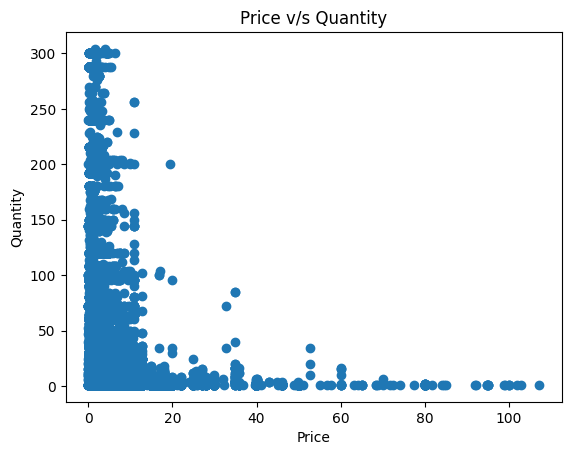

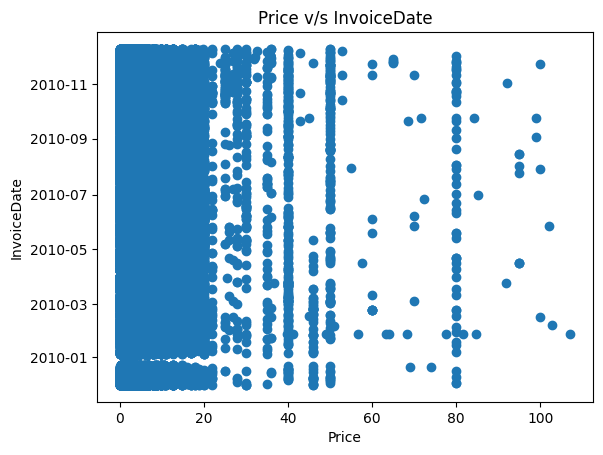

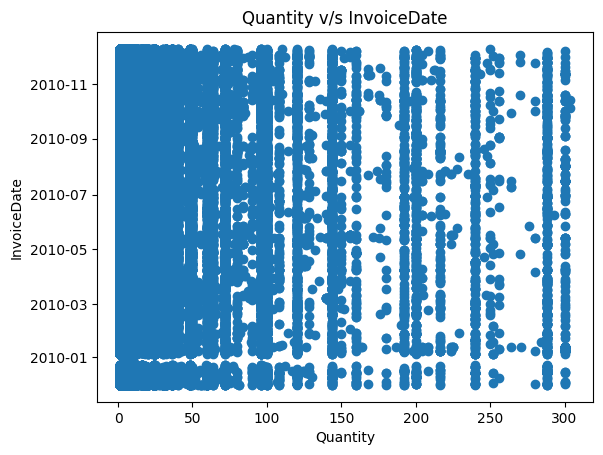

## Correlation:

## Missing Matrix:

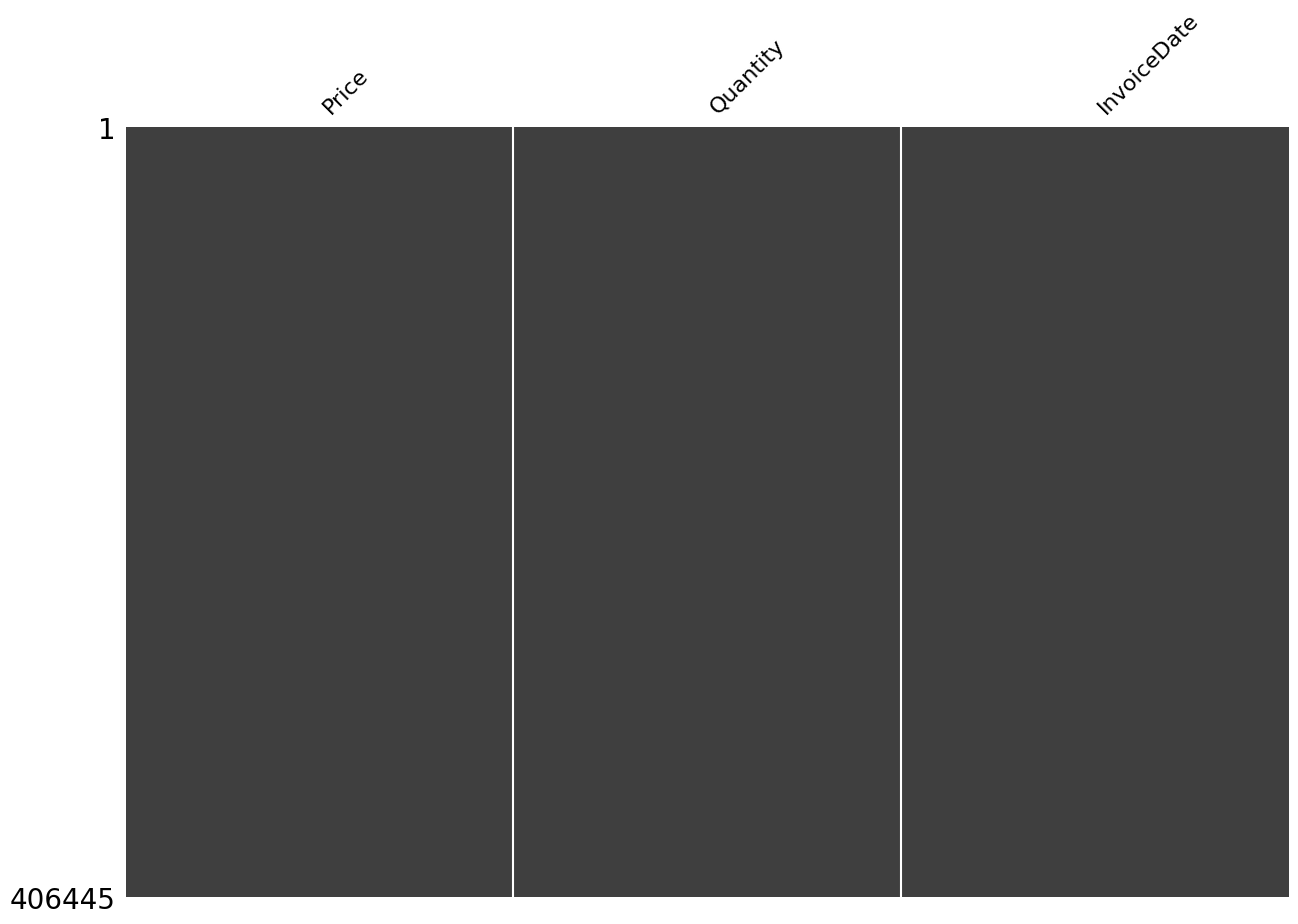

In [62]:
profile_df(df_cleaned[['Price', 'Quantity', 'InvoiceDate']])

Debido a la eliminación de outliers y valores negativos ahora las visualizaciones son más claras. Sin embargo, la única relación clara entre las variables se da entre la cantidad y el precio unitario, en donde se evidencia que hay una mayor cantidad de unidades vendidas entre menor sea el precio unitario.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [ ]:
def plot_ventas(dataframe):
    pass

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>